In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

<img src="Figurer/NTNU_Logo.png" align="left" width="30%">
<br clear="all" />
<br></br>

# RLC-kretser og komplekse tall

* **Emne AIS1004 - Industriell Elektroteknikk**
* **Uke 7, 2024**
* **Underviser: Kai Erik Hoff**



# Tema

* Repetisjon spoler og kondensatorer
* RC-krets
* RL-krets
* RLC-krets
* Komplekse tall


# Rep: Spoler

<img src="Figurer/07_RLC/Inductors.png" width="80%" />

# Rep: Kondensatorer
<img src="Figurer/07_RLC/Capacitors.png" width="80%" />

## Før vi begynner:


* RLC-kretser fører til andreordens differensialligninger

* Fordelaktig å ta i bruk hjelpemidler som Python for å visualisere/utregne

* Derfor vil noen av forelesningene bruke Jupyter

# RL-kretsen

<img src="Figurer/07_RLC/RC1.png" width="50%" />


$$
\begin{align}
v_0(t) &=  R\cdot i(t) + v_C(t) \\
i(t) &= C\cdot\frac{d v_C(t)}{dt}\\
v_0(t) &= RC\cdot\frac{d v_C(t)}{dt} + v_C(t) \\
\end{align}
$$

## Eksempel:
* Verdier: $R = 10\Omega$, $C = 0.01F$, $v_0(t) = 1V$

Text(0, 0.5, 'Spenning $v_C(t)$')

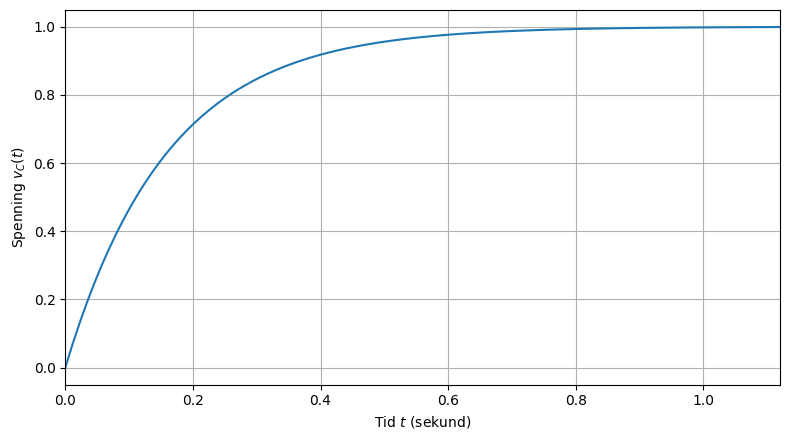

In [2]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

R = 5 # Ohm
C = 0.032 # Farad

RC_circ = sig.TransferFunction([1], [R*C, 1]) # Forklares senere

t, v_C = RC_circ.step() # v_C(t) når v_0(t) = 1V

plt.plot(t, v_C)
plt.xlabel("Tid $t$ (sekund)")
plt.ylabel("Spenning $v_C(t)$")

## Løsning:

1. Finn først $v_C(t)$ for kretsen uten påtrykt spenning:
$$RC\cdot\frac{d v_C(t)}{dt} + v_C(t) = 0$$
2. Sett inn egenfunksjonen $v_C(t) = A \cdot e^{s\cdot t}$ og finn $s$:
$$
\begin{align}
RC\cdot\frac{dA \cdot e^{s\cdot t}}{dt} +A \cdot e^{s\cdot t} &= 0 \\
RC\cdot s\cdot A \cdot e^{s\cdot t} + A \cdot e^{s\cdot t} &= 0 \\
s\cdot RC + 1 &= 0 \text{      (karakteristisk ligning)} \\
s = -\frac{1}{RC}
\end{align}
$$
3. Ta med $v_0(t)$ i beregningene. <br>
    Konstant spenning $v_0(t)=K$ gir da: 
    $$\begin{align}v_C(t) &= v_C(\infty) + (v_C(0) - v_C(\infty))\cdot e^{-\frac{t}{RC}}\\
    &= v_C(\infty) + (v_C(0) - v_C(\infty))\cdot e^{-\frac{t}{\tau}}\end{align}$$

### Tidskonstanten $\tau$
* Tiden det tar for $v_C(t)-v_C(\infty)$ å nå $\frac{1}{e}$ av initiell verdi.

# RL-kretsen


<img src="Figurer/07_RLC/RL1.png" width="50%" />


$$
\begin{align}
v_0(t) &=  R\cdot i(t) + v_L(t) \\
i(t) &= \frac{1}{L}\cdot \int_0^t v_L(\tau) d\tau  + i(0)\\
v_0(t) &= \frac{R}{L}\cdot \int_0^t v_L(\tau) d\tau + v_L(t) + i(0)\\
\frac{dv_0(t)}{dt} &= \frac{R}{L}\cdot v_L(t) + \frac{dv_L(t)}{dt}
\end{align}
$$

## Eksempel:
* Verdier: $R = 10\Omega$, $C = 0.1H$, $v_0(t) = 1V$

Text(0, 0.5, 'Spenning $v_C(t)$')

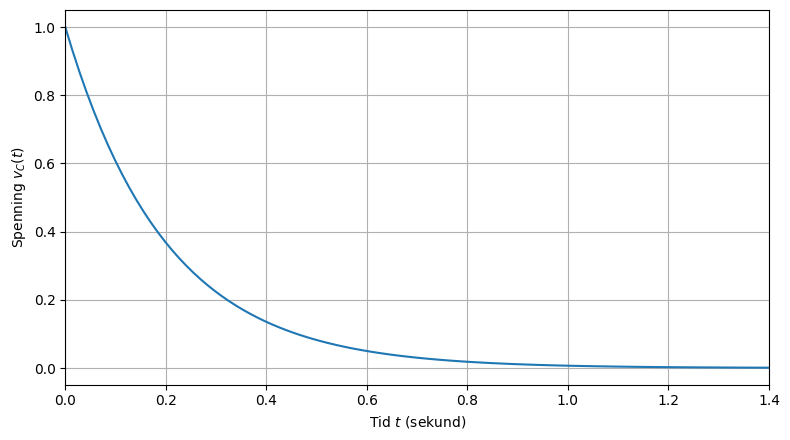

In [3]:
R = 5 # Ohm
L = 1 # Henry

RC_circ = sig.TransferFunction([1, 0], [1, R/L]) # Forklares senere

t, v_C = RC_circ.step() # v_C(t) når v_0(t) = 1V

plt.plot(t, v_C)
plt.xlabel("Tid $t$ (sekund)")
plt.ylabel("Spenning $v_C(t)$")

## Løsning:

1. Finn først $v_L(t)$ for kretsen uten påtrykt spenning:
$$\frac{R}{L}\cdot\frac{d v_L(t)}{dt} + v_L(t) = 0$$
2. Sett inn egenfunksjonen $v_L(t) = A \cdot e^{s\cdot t}$ og finn $s$:
$$
\begin{align}
\frac{R}{L}\cdot\frac{dA \cdot e^{s\cdot t}}{dt} +A \cdot e^{s\cdot t} &= 0 \\
\frac{R}{L}\cdot s\cdot A \cdot e^{s\cdot t} + A \cdot e^{s\cdot t} &= 0 \\
s\cdot \frac{R}{L} + 1 &= 0 \text{      (karakteristisk ligning)} \\
s = -\frac{L}{R}
\end{align}
$$
3. Ta med $v_0(t)$ i beregningene. <br>
    Konstant påtrykt spenning $v_0(t)$ gir da: 
    $$\begin{align}v_L(t) &= v_L(\infty) + (v_L(0) - v_L(\infty))\cdot e^{-\frac{L\cdot t}{R}}\\
    &= v_L(\infty) + (v_L(0) - v_L(\infty))\cdot e^{-\frac{t}{\tau}}\end{align}$$

# RLC-kretsen


<img src="Figurer/07_RLC/RLC1.png" width="70%" />

$$
\begin{align}
v_0(t) &=  R\cdot i(t) + L\cdot \frac{di(t)}{dt} + v_C(t)\\
i(t) &= C\cdot\frac{d v_C(t)}{dt}\\
v_0(t) &= LC\cdot \frac{d^2 v_C(t)}{dt^2} + RC \cdot \frac{d v_C(t)}{dt} + v_C(t)
\end{align}
$$

## Eksempel:
* Verdier: $R = 5\Omega$, $C = 0.2H$, $C = 0.1F$, $v_0(t) = 1V$

Text(0, 0.5, 'Spenning $v_C(t)$')

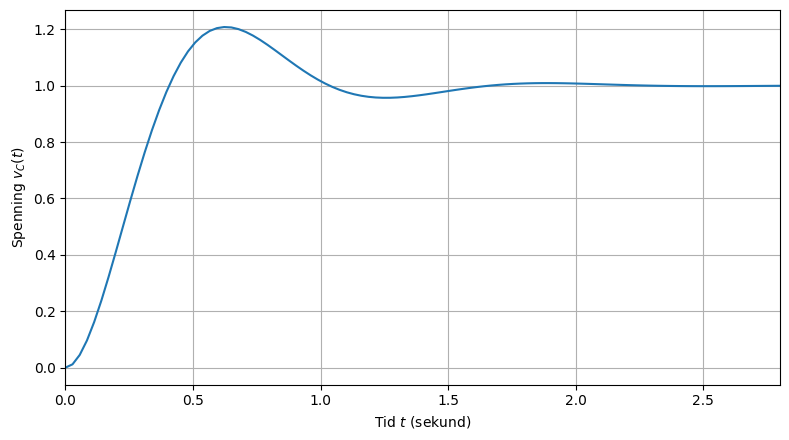

In [4]:
R = 5 # Ohm
L = 1 # Henry
C = 0.032 # Farad

RLC_circ = sig.TransferFunction([1], [L*C, R*C, 1]) # Forklares senere
t, v_C = RLC_circ.step() # v_C(t) når v_0(t) = 1V

plt.plot(t, v_C)
plt.xlabel("Tid $t$ (sekund)")
plt.ylabel("Spenning $v_C(t)$")

## Løsning:


1. Finn først $v_C(t)$ for kretsen uten påtrykt spenning:
$$ LC\cdot \frac{d^2 v_C(t)}{dt^2} + RC \cdot \frac{d v_C(t)}{dt} + v_C(t) = 0$$
2. Sett inn egenfunksjonen $v_C(t) = A \cdot e^{s\cdot t}$ og finn $s$:
$$
\begin{align}
 LC\cdot \frac{d^2 A \cdot e^{s\cdot t}}{dt^2} + RC \cdot \frac{dA \cdot e^{s\cdot t}}{dt} + A \cdot e^{s\cdot t} &= 0 \\
s^2\cdot LC\cdot A \cdot e^{s\cdot t} + s\cdot RC \cdot A \cdot e^{s\cdot t} + v_C(t) &= 0 \\
s^2\cdot LC + s\cdot RC + 1 &= 0 \text{      (karakteristisk ligning)} \\
\end{align}
$$
3. Finn løsningene $s_1$ og $s_2$ på andregradsligningen. Deretter blir det interessant..

# Dempingsrate og egenfrekvens

* Den karakteristiske ligningen formuleres ofte med to spesielle parametre: dempingsrate $\xi$, og egenfrekvesn $\omega_0$.
$$s^2 + 2\xi \omega_0\cdot s + \omega_0^2 = 0$$


* Hvordan kondensatorspenningen $v_C(t)$ ser ut avhenger av dempingsraten $\xi$:
    * $\xi>1$ gir overdempet system
    * $\xi=1$ gir kritisk dempet system
    * $\xi<1$ gir underdempet system

# Overdempet system

* Dempingsrate $\xi>1$:

<img src="Figurer/07_RLC/OverdampedV.png" width="40%" />

* Egenrespons: 
$$v_C(t) = K_1 \cdot e^{s_1\cdot t} + K_1 \cdot e^{s_1\cdot t}$$

# Kritisk dempet system

* Dempingsrate $\xi=1$:

<img src="Figurer/07_RLC/CritdampedV.png" width="40%" />

* Egenrespons: 
$$v_C(t) = K_1 \cdot e^{s_1\cdot t} + K_1 \cdot t \cdot e^{s_2\cdot t}, \ \ \ s_1=s_2$$

# Underdempet system

* Dempingsrate $\xi<1$:

<img src="Figurer/07_RLC/UnderdampedV.png" width="40%" />

* Egenrespons: 
$$v_C(t) = e^{-\xi\omega_0\cdot t}\cdot\left(A_1\cos(\omega_d\cdot t) + A_2\sin(\omega_d\cdot t)\right)$$

## Eksempel:

Text(0, 0.5, 'Spenning $v_C(t)$')

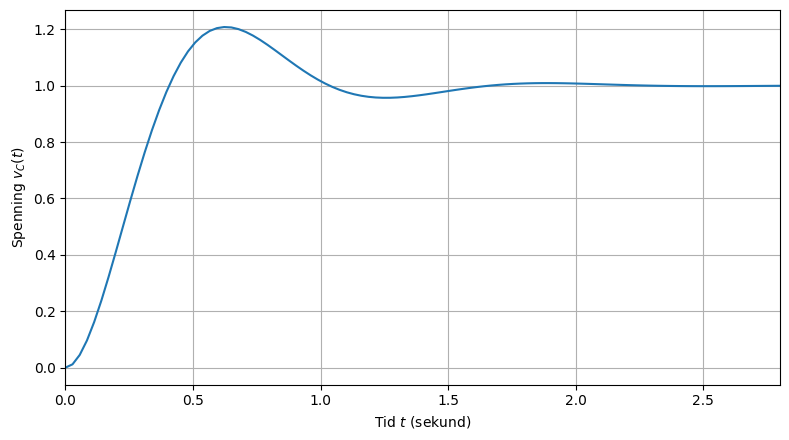

In [5]:
xi = 2.0 # Dempingsrate
w_0 = 10 # Naturlig frekvens (rad/s)

RLC_circ = sig.TransferFunction([w_0**2], [1, 2*xi*w_0, w_0**2]) # Forklares senere
t, v_C = RLC_circ.step() # v_C(t) når v_0(t) = 1V

plt.plot(t, v_C)
plt.xlabel("Tid $t$ (sekund)")
plt.ylabel("Spenning $v_C(t)$")

#### Hvor kommer svingningene fra?

* Svingningene resulterer av at løsningene $s_1$ og $s_2$ på den karakteristiske ligningen er *komplekse*: $s = \sigma + j\cdot \omega$.

<div style="width: 100%;">
    <img src="Figurer/03_Sinussignal/Fig7_xkcd_eipi.png" style="float: right; width: 50%" />
    <div style="width: 30%">
        <br>
    <h1>Komplekse tall:</h1>
        <h2><i>En oppfriskning</i></h2>
    </div>
</div> 

## Imaginære tall

<br>

* Uttrykk på formen $a \cdot \sqrt{-1}$ har en *imaginær verdi*, da det ikke finnes noe reelt tall $x$ der $x^2= -1$.
* Det kan allikevel være fordelaktig å arbeide med imaginære tall ($a \cdot \sqrt{-1}$).
    - Så lenge vi ikke faktisk prøver å regne ut verdien til $\sqrt{-1}$, er det fullt mulig å ta med $\sqrt{-1}$ i videre utregninger.
* Eksempel: 
\begin{align*}
x^2 + 9 &= 0\\
x^2 &= -9\\
x &= \sqrt{-9}\\
&= \sqrt{-1\cdot 3^2}\\
&= \sqrt{3^2}\cdot\sqrt{-1}\\
&= \pm 3 \cdot \sqrt{-1}
\end{align*}

## Regneoperasjoner med imaginære tall

<br>

* Vi kan ta i bruk kjente regneregler når vi regner med imaginære tall
* **Addisjon:**
\begin{align}
a \cdot \sqrt{-1} + b \cdot \sqrt{-1} &= (a + b) \sqrt{-1}
\end{align}
* **Multiplikasjon:**
\begin{align*}
\left(a \cdot \sqrt{-1}\right) \cdot \left( b \cdot \sqrt{-1}\right) &= a \cdot b \cdot  \left(\sqrt{-1}\right)^2 \\
&= a \cdot b \cdot \left( (-1) ^{\frac{1}{2}} \right) ^2 \\
&= a \cdot b \cdot (-1)^{\frac{1}{2}\cdot 2}\\
&= a \cdot b \cdot (-1)^1\\
&= - a \cdot b
\end{align*}

## Kompleske tall

* Består av reelle og imaginære komponenter
* Substituerer *imaginær enhet* $\sqrt{-1}$ med et eget symbol $j$:
$$\sqrt{-1} = j$$
* Komplekse tall notasjon:
$$z = x + j\cdot y $$


<img src="Figurer/03_Sinussignal/Fig08_compNum.png" width="70%" />

* I matematiske fag brukes i stor grad $i$ som symbol for imaginær enhet. I fagfeltene elektro og automasjon brukes heller $j$, da $i$ typisk er forbeholdt *strøm*.

# Komplekse tall som vektorer

<img src="Figurer/03_Sinussignal/Fig09_compVect.jpg" width="80%"/>

## Kompleks addisjon (vektoraddisjon)
* Enklest å regne ut på _kartesisk form_.
    - For å legge sammen to komplekse tall på polarform er det ofte mest hensiktsmessig å skrive om til kartesisk form.
    
<img src="Figurer/03_Sinussignal/Fig12_compAdd.jpg" width="80%" />

## Kompleks subtraksjon
* Benytter vektoraddisjon
* Negativ vektor peker i motsatt retning

<img src="Figurer/03_Sinussignal/Fig13_compSub.jpg" width="80%" />

## Komplekse tall i python

* Bokstaven `j` kan benyttes til å designere en numerisk verdi som imaginær.

In [6]:
z1 = 3 + 4j
print('z1 =', z1)

z2 = -4 + 2j
print('z2 =', z2)

print('z1 + z2 =', z1 + z2)

z1 = (3+4j)
z2 = (-4+2j)
z1 + z2 = (-1+6j)


## Polarform

<br>
<div style="width: 100%;">
    <img src="Figurer/03_Sinussignal/Fig10_polarform.jpg" align="right" width="40%" />
    <div style="width: 50%">
    <ul>
      <li>Vektorform</li>
      <ul><li>Lengde = $r$</li>
          <li>Vinkel = $\theta$ </li></ul>
      <li>Vanlige verdier</li>
      <ul><li>$j$ har vinkelen $\theta = \frac{\pi}{2}$</li>
        <li>$-1$ har vinkelen $\theta = \pi$</li>
        <li>$-j$ har vinkelen $\theta = \frac{3\pi}{2}$</li>
        <li>$-j$kan også sies å ha vinkelen $\theta = -\frac{\pi}{2}$</li>
          <ul><li><i>Ulik rotasjonsretning, men samme destinasjon. </i></li></ul>
      </ul>
    </ul>  
    </div>
</div> 

## Polarkoordianter $\leftrightarrow$ Kartesiske koordinater


<div style="width: 100%;">
    <img src="Figurer/03_Sinussignal/Fig11_sq2pol.jpg" width="40%" align="right" />
    <div width="50%" align="left">
    <br>
    <ul>
      <li>Polarform fra kartesisk form:</li>
      </ul>
       $$r = \sqrt{x^2+y^2}$$
       $$\theta = \arctan \left(\frac{y}{x}\right) ^ {[1]}$$
        <ul><li>Kartesisk form fra polarform:</li></ul>
       $$ x = r\cdot \cos(\theta)$$
       $$ y = r\cdot \sin(\theta)$$
    </div>
</div> 

[1] - Vil kun gjelde for komplekse tall der $\mathfrak{R}e(z) > 0$. Arbeider du i python er det mer hensiktsmessig å bruke funksjonen `np.angle()`.

<img src="Figurer/03_Sinussignal/Fig13_2_Eulerform.png" width="80%"/>

* Dersom du har 3.14 minutter å avse, finnes en youtube-video med en veldig god forklaring på dette [her](https://www.youtube.com/watch?v=v0YEaeIClKY&vl=en).

## Eulers formel
* Matematisk notasjon for komplekse tall på polarform:

## $$r\cdot e^{j\theta} = r\cdot \cos(\theta) + j\cdot r\cdot \sin(\theta)$$

## Komplekse tall på polarform (*demo*):

Output()

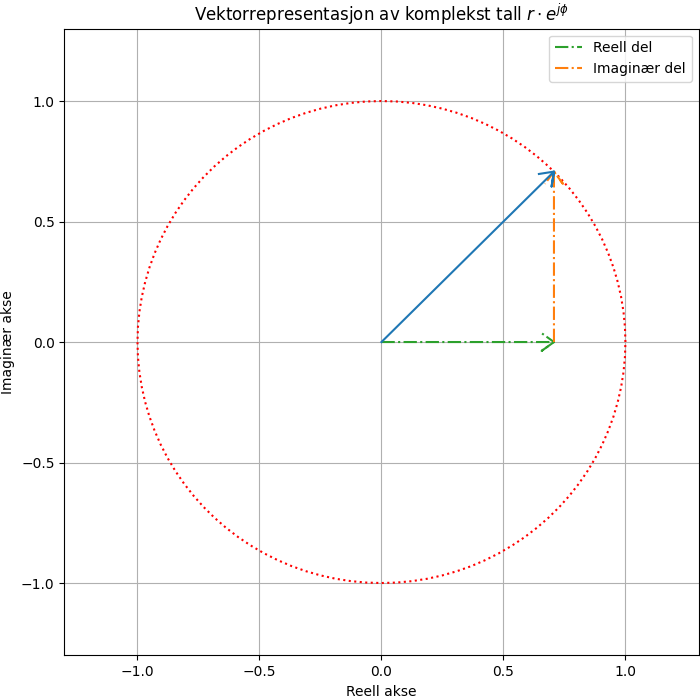

In [7]:
from Kildekode._03_Sinussignal import ComplexPolarDemo
%matplotlib ipympl
ComplexPolarDemo(4, fig_size=(7,7));

## Polarform i Python

* Modulen `numpy` har en rekke nyttige funksjoner: `abs()`, `angle()`, `real()` og `imag()`.
* Andre nyttige trigonometriske funksjoner i `numpy`: `cos()`, `sin()`, `hypot()`, `arctan2()` og `exp()`.

In [8]:
# Kartesisk form

x = -2
y = -3
# Trigonometrisk funksjon arctan2() kan brukes til å regne ut tan^-1
# (bruk denne istedenfor arctan(), da den ikke håndterer fortegn på noen bra måte.)
print("Vinkel i radianer: ", np.arctan2(x,y))

# Komplekst tall på kartesisk form
z1 = x + 1j*y
print("\nKomplekst tall z = ", z1)
print("Polarkoordinat r: ", abs(z1))
print("Vinkel i grader: ", np.angle(z1)/np.pi*180)

# Komplekst tall på Polarform: ,
print("\nNytt tall z = 3*e^(j0.75*pi)")
z2 = 3*np.exp(3j*np.pi/4)
print("Reell del: ", np.real(z2))
print("Imaginær del: ", np.imag(z2))

Vinkel i radianer:  -2.5535900500422257

Komplekst tall z =  (-2-3j)
Polarkoordinat r:  3.605551275463989
Vinkel i grader:  -123.69006752597977

Nytt tall z = 3*e^(j0.75*pi)
Reell del:  -2.1213203435596424
Imaginær del:  2.121320343559643


## Kompleks multiplikasjon

* Enklest å regne ut på polarform
* Skalerer og roterer en vektor

<img src="Figurer/03_Sinussignal/Fig14_compMult.jpg" width="75%" align="center"/>

## Kompleks Divisjon

* På polarform:
    - finn den inverterte av neveneren: $\frac{1}{z} = r^{-1}\cdot e^{-j\theta}$
    - Skalér og roter vektor som med multiplikasjon.

<img src="Figurer/03_Sinussignal/Fig16_compDiv.jpg" width="70%" align="center"/>

## Komplekskonjugering
<br>
<div>
<img src="Figurer/03_Sinussignal/Fig17_compConj.jpg" width="40%" align="right"/>
</div>
<div style="width: 60%">
<ul>
  <li>"Speiling" av kompleks vektor over x-aksen</li>
  <li>På kartesisk form:</li>
  <ul><li>$z = x+jy$</li>
      <li>$z^{*} = x-jy$ </li></ul>
  <li>På polarform:</li>
  <ul><li>$z = r\cdot e^{j\theta}$</li>
      <li>$z^{*} = r\cdot e^{-j\theta}$ </li></ul>
  <li>Nyttige egenskaper:</li>
  <ul><li>$\mathfrak{R}(z) = \frac{1}{2}\left(z+z^{*}\right)$</li>
      <li>$\mathfrak{I}(z) = \frac{1}{2}\left(z-z^{*}\right)$</li>
      <li>$\left| z\right| ^{2} = z\cdot z^{*}$ </li>
    </ul>
</ul>  
</div>


# Tilbake til RLC-kretser...

* Vi kan analysere løsningene på den karakteristiske ligningen i det komplekse plan

<img src="Figurer/07_RLC/ChareqSolutions.png" width="100%"/>

### Seriekoblet RLC kodeeksempel:

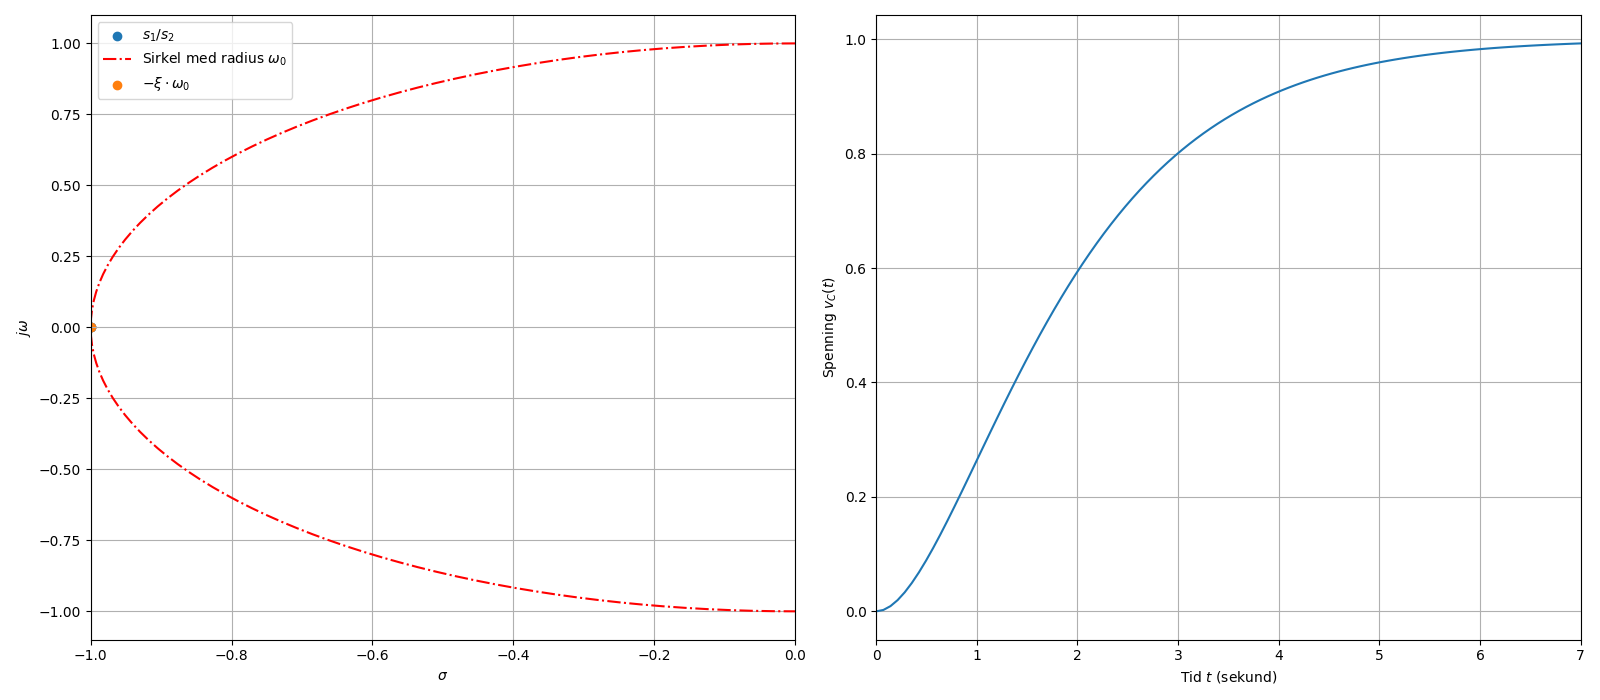

In [32]:
xi = 1 # Dempingsrate
w_0 = 1 # Naturlig frekvens (rad/s)

def plotCircuitResponse(xi, w_0):
    RLC_circ = sig.TransferFunction([w_0**2], [1, 2*xi*w_0, w_0**2]) # Forklares senere
    t, v_C = RLC_circ.step() # v_C(t) når v_0(t) = 1V

    s = np.roots([1, 2*xi*w_0, w_0**2])
    plt.close(10);plt.figure(10, figsize=(16,7))
    plt.subplot(1,2,1)
    plt.scatter(np.real(s), np.imag(s), label='$s_1$/$s_2$')
    plt.plot(np.cos(np.linspace(np.pi/2, np.pi*1.5, 101))*w_0, np.sin(np.linspace(np.pi/2, np.pi*1.5, 101))*w_0, 'r-.', label=r"Sirkel med radius $\omega_0$")
    plt.scatter([-xi*w_0], [0], label=r"$-\xi \cdot \omega_0$")
    plt.legend()
    plt.xlabel("$\sigma$")
    plt.ylabel("$j\omega$")
    plt.subplot(1,2,2)
    plt.plot(t, v_C)
    plt.xlabel("Tid $t$ (sekund)")
    plt.ylabel("Spenning $v_C(t)$")
    
plotCircuitResponse(xi, w_0)

# Men hva med AC-spenning?

* RL, RC og RLC-kretser har noen svært nyttige egenskaper når de påtrykkes en AC-spenning

In [1]:

t = np.linspace(0, 1, 501)
v0 = np.cos(2*np.pi*5*t)

xi = 2.0 # Dempingsrate
w_0 = 10 # Naturlig frekvens (rad/s)



RLC_circ = sig.TransferFunction([w_0**2], [1, 2*xi*w_0, w_0**2]) # Forklares senere
_, v_C, _= RLC_circ.output(v0, t) # v_C(t) når v_0(t) = 1V

plt.figure()
plt.plot(t, v0, label=r"v_0(t)")
plt.plot(t, v_C, label=r"v_C(t)")
plt.legend()
plt.xlabel("Tid $t$ (sekund)")
plt.ylabel("Spenning $v_C(t)$")

NameError: name 'np' is not defined

### **Sinusbølge inn $\rightarrow$ sinusbølge ut!**
* Kun endring i amplitude og fase (timing)
* Fokus for neste time